# Regression Models

### Imports

In [349]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
from numpy import log as ln

   # Model 1:
   ### y = ax + b

## Data

In [350]:
heights = [70,60, 62,77,73,73,68,70,67,72,63,64,65,64,66,73,74,60,66,65,68,68,67,64,62,63,70,66,74,72,62,65,67,
67,74,69,66,72,70,75,66,68,70,67,76,76,71,76,73,68]

weights = [192,150,135,185,121,195,220,173,164,190,120,150,110,130,180,245,220,131,185,158,165,180,145,115,160,175 
,250,190,200,130,115,150,174,225,230,218,240,250,190,250,140,190,194,190,163,185,145,250,211,165]

In [351]:
df1 = pd.DataFrame(
[heights, weights],index=['Height','Weight']).transpose()

### Scatter plot comparing Height and Weight

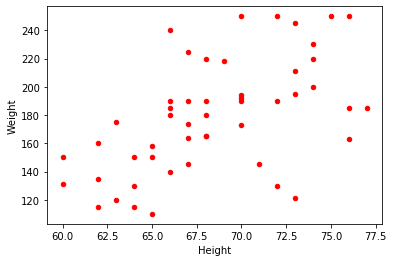

In [352]:
df1.plot(kind='scatter',x='Height',y='Weight',color='red')
plt.show()

## Running the Ordinary Least Squares methodology

In [353]:
X = df["Height"] ## X usually means our input variables (or independent variables)
y = df["Weight"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Ordinary Least Squares
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     20.96
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           3.34e-05
Time:                        16:18:14   Log-Likelihood:                -245.58
No. Observations:                  50   AIC:                             495.2
Df Residuals:                      48   BIC:                             499.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -156.7809     73.450     -2.135      0.038    -304.462      -9.100
Height         4.9001      1.070      4.578      0.000       2.748       7.052
==============================================================================
Omnibus:                        0.053   Durbin-Watson:                   1.219
Prob(Omnibus):                  0.974   Jarque-Bera (JB):                0.097
Skew:                          -0.063   Prob(JB):                        0.953
Kurtosis:                       2.825   Cond. No.                     1.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Concluding Model

In [354]:
def model_1(x):
    return 4.9001*x - 156.7809

In [355]:
# Predicting Y using model 1
tmp = []
for x in df1['Height']:
    tmp.append(model_1(x))
df1['Prediction'] = tmp

In [356]:
tmp = []
for row in df1.itertuples(index=False):
    tmp.append(row.Weight - row.Prediction)
df1['d'] = tmp

In [357]:
total = 0
m = df1['d'].count()
for d in df1['d']:
    total = total + (d**2)/m
D_1 = math.sqrt(total)

In [358]:
D_1

32.87125826455689

In [359]:
df1.round()

,Height,Weight,Prediction,d
0,70,192,186.0,6.0
1,60,150,137.0,13.0
2,62,135,147.0,-12.0
3,77,185,221.0,-36.0
4,73,121,201.0,-80.0
5,73,195,201.0,-6.0
6,68,220,176.0,44.0
7,70,173,186.0,-13.0
8,67,164,172.0,-8.0
9,72,190,196.0,-6.0


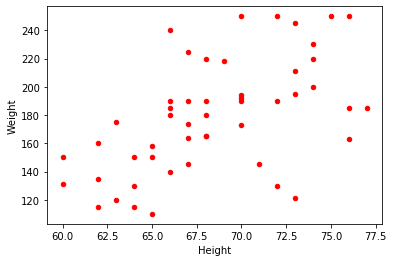

In [360]:
df1.plot(kind='scatter',x='Height',y='Weight',color='red')

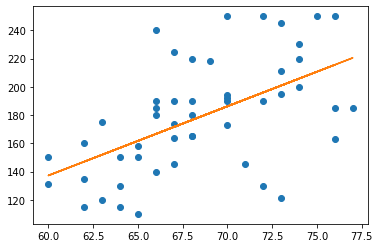

In [361]:
x = df1['Height']
y = df1['Weight']
plt.plot(x, y, 'o')
a, b = 4.9001, -156.7809
plt.plot(x, a*x + b)

   # Model 2:
   ### y = ax^2

In [362]:
# Data
heights2 = [height**2 for height in heights]

df2 = pd.DataFrame(
[heights2, weights],index=['Height','Weight']).transpose()

In [363]:
X = df2["Height"]
y = df2["Weight"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Weight   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              1454.
Date:                Thu, 23 Apr 2020   Prob (F-statistic):                    4.33e-38
Time:                        16:18:16   Log-Likelihood:                         -245.86
No. Observations:                  50   AIC:                                      493.7
Df Residuals:                      49   BIC:                                      495.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Height         0.0379      0.001     38.130      0.000       0.036       0.040
==============================================================================
Omnibus:                        0.146   Durbin-Watson:                   1.196
Prob(Omnibus):                  0.929   Jarque-Bera (JB):                0.103
Skew:                          -0.096   Prob(JB):                        0.950
Kurtosis:                       2.887   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [364]:
## Concluding Model
def model_2(x):
    return 0.0379*(x)

In [365]:
tmp = []
for x in df2['Height']:
    tmp.append(model_2(x))
df2['Prediction'] = tmp

In [366]:
# Predicting Y using model 1
tmp = []
for x in df2['Height']:
    tmp.append(model_2(x))
df2['Prediction'] = tmp

tmp = []
for row in df2.itertuples(index=False):
    tmp.append(row.Weight - row.Prediction)
df2['d'] = tmp

total = 0
m = df2['d'].count()
for d in df2['d']:
    total = total + (d**2)/m
D_2 = math.sqrt(total)

In [367]:
D_2

33.0565055601284

In [368]:
df2.round()

,Height,Weight,Prediction,d
0,4900,192,186.0,6.0
1,3600,150,136.0,14.0
2,3844,135,146.0,-11.0
3,5929,185,225.0,-40.0
4,5329,121,202.0,-81.0
5,5329,195,202.0,-7.0
6,4624,220,175.0,45.0
7,4900,173,186.0,-13.0
8,4489,164,170.0,-6.0
9,5184,190,196.0,-6.0


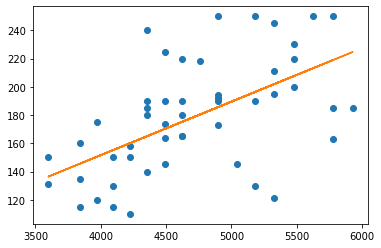

In [369]:
x = df2['Height']
y = df2['Weight']
plt.plot(x, y, 'o')
a = 0.0379
plt.plot(x, a*(x))

   # Model 3:
   ### y = C*e^(kx)
   ### ln(y) = ax + ln(b)


In [370]:
weights2 = [ln(weight) for weight in weights]

In [371]:
df3 = pd.DataFrame(
[heights, weights2],index=['Height','Weight']).transpose()

In [372]:
X = df3["Height"]
y = df3["Weight"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
const = model.params['const']
predictions = model.predict(X) # make the predictions by the model
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     20.88
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           3.43e-05
Time:                        16:18:17   Log-Likelihood:                 12.562
No. Observations:                  50   AIC:                            -21.12
Df Residuals:                      48   BIC:                            -17.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2435      0.421      7.712      0.000       2.398       4.089
Height         0.0280      0.006      4.570      0.000       0.016       0.040
==============================================================================
Omnibus:                        1.780   Durbin-Watson:                   1.240
Prob(Omnibus):                  0.411   Jarque-Bera (JB):                1.466
Skew:                          -0.417   Prob(JB):                        0.481
Kurtosis:                       2.913   Cond. No.                     1.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [373]:
## Concluding Model
def model_3(x):
    return 0.0280*(x)+3.2435

In [374]:
# Predicting Y using model 1
tmp = []
for x in df3['Height']:
    tmp.append(model_3(x))
df3['Prediction'] = tmp

tmp = []
for row in df3.itertuples(index=False):
    tmp.append(row.Weight - row.Prediction)
df3['d'] = tmp

total = 0
m = df3['d'].count()
for d in df3['d']:
    total = total + (d**2)/m

In [375]:
D_3 = math.sqrt(total)
D_3

0.1882123831830853

In [376]:
df3.round(3)

,Height,Weight,Prediction,d
0,70.0,5.257,5.204,0.054
1,60.0,5.011,4.924,0.087
2,62.0,4.905,4.980,-0.074
3,77.0,5.220,5.400,-0.179
4,73.0,4.796,5.288,-0.492
5,73.0,5.273,5.288,-0.015
6,68.0,5.394,5.148,0.246
7,70.0,5.153,5.204,-0.050
8,67.0,5.100,5.120,-0.020
9,72.0,5.247,5.260,-0.012


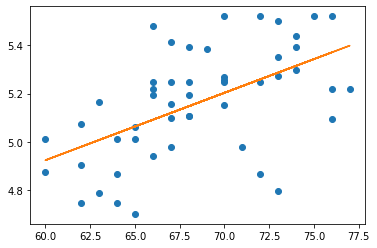

In [377]:
x = df3['Height']
y = df3['Weight']
plt.plot(x, y, 'o')
a, b = 0.0280, 3.2435
plt.plot(x, a*(x) + b)

   # Model 4:
   ### y = ax^2 + bx + c


In [378]:
df4 = pd.DataFrame(
[heights2, heights, weights],index=['Height2','Height','Weight']).transpose()

In [379]:
X = df4[["Height2",'Height']]
y = df4["Weight"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     11.49
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           8.66e-05
Time:                        16:18:18   Log-Likelihood:                -244.68
No. Observations:                  50   AIC:                             495.4
Df Residuals:                      47   BIC:                             501.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1550.3768   1068.391     -1.451      0.153   -3699.703     598.950
Height2       -0.2968      0.227     -1.307      0.197      -0.754       0.160
Height        45.6638     31.196      1.464      0.150     -17.095     108.423
==============================================================================
Omnibus:                        0.143   Durbin-Watson:                   1.367
Prob(Omnibus):                  0.931   Jarque-Bera (JB):                0.178
Skew:                          -0.114   Prob(JB):                        0.915
Kurtosis:                       2.816   Cond. No.                     1.08e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [380]:
## Concluding Model
def model_4(x):
    return -0.2968*(x**2) + 45.6638*x - 1550.3768

In [381]:
tmp = []
for x in df4['Height']:
    tmp.append(model_4(x))
df4['Prediction'] = tmp

tmp = []
for row in df4.itertuples(index=False):
    tmp.append(row.Weight - row.Prediction)
df4['d'] = tmp

total = 0
m = df4['d'].count()
for d in df4['d']:
    total = total + (d**2)/m

In [382]:
D_4 = math.sqrt(total)
D_4

32.290094781031506

In [383]:
df4.round()

,Height2,Height,Weight,Prediction,d
0,4900,70,192,192.0,0.0
1,3600,60,150,121.0,29.0
2,3844,62,135,140.0,-5.0
3,5929,77,185,206.0,-21.0
4,5329,73,121,201.0,-80.0
5,5329,73,195,201.0,-6.0
6,4624,68,220,182.0,38.0
7,4900,70,173,192.0,-19.0
8,4489,67,164,177.0,-13.0
9,5184,72,190,199.0,-9.0


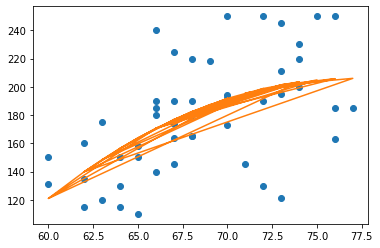

In [384]:
x = df4['Height']
z = df4['Height2']
y = df4['Weight']
plt.plot(x, y, 'o')
a, b, c = -0.2968, 45.6638, -1550.3768
plt.plot(x, a*(z) + b*x + c)

   # Model 5:
   ### y = ax^b
   ### log(y) = b*log(x) + b*log(a)


In [385]:
weights3 = [math.log10(weight) for weight in weights]
heights3 = [math.log10(height) for height in heights]

df5 = pd.DataFrame(
[heights3, weights3],index=['Height','Weight']).transpose()

X = df5["Height"]
y = df5["Weight"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
 # make the predictions by the model
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     21.50
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           2.75e-05
Time:                        16:18:20   Log-Likelihood:                 54.487
No. Observations:                  50   AIC:                            -105.0
Df Residuals:                      48   BIC:                            -101.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3093      0.766     -1.709      0.094      -2.849       0.231
Height         1.9354      0.417      4.636      0.000       1.096       2.775
==============================================================================
Omnibus:                        1.926   Durbin-Watson:                   1.253
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.562
Skew:                          -0.432   Prob(JB):                        0.458
Kurtosis:                       2.941   Cond. No.                         155.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [386]:
## Concluding Model
def model_5(x):
    return 1.9354*x - 1.3093

# Predicting Y using model 1
tmp = []
for x in df5['Height']:
    tmp.append(model_5(x))
df5['Prediction'] = tmp

tmp = []
for row in df5.itertuples(index=False):
    tmp.append(row.Weight - row.Prediction)
df5['d'] = tmp

total = 0
m = df5['d'].count()
for d in df5['d']:
    total = total + (d**2)/m

In [387]:
D_5 = math.sqrt(total)
D_5

0.08137645603401288

In [388]:
df5.round(3)

,Height,Weight,Prediction,d
0,1.845,2.283,2.262,0.022
1,1.778,2.176,2.132,0.044
2,1.792,2.130,2.160,-0.029
3,1.886,2.267,2.342,-0.075
4,1.863,2.083,2.297,-0.214
5,1.863,2.290,2.297,-0.007
6,1.833,2.342,2.237,0.105
7,1.845,2.238,2.262,-0.024
8,1.826,2.215,2.225,-0.010
9,1.857,2.279,2.285,-0.007


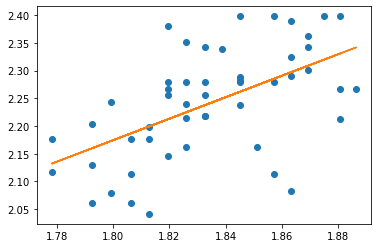

In [389]:
x = df5['Height']
y = df5['Weight']
plt.plot(x, y, 'o')
a, b = 1.9354, -1.3093
plt.plot(x, a*(x) + b)

In [391]:
dfD = pd.DataFrame(
[[D_1, D_2, D_3, D_4, D_5]],
columns=['y=ax+b','y=ax^2', 'ln(y)=ax+ln(b)', 'y=ax^2+bx+c', 'log(y)=b*log(x)+b*log(a)'],
index=['D'])
dfD.round(2)

,y=ax+b,y=ax^2,ln(y)=ax+ln(b),y=ax^2+bx+c,log(y)=b*log(x)+b*log(a)
D,32.87,33.06,0.19,32.29,0.08
